In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plot_fit(x,y,mu,var, m_y='k-o', m_mu='b-<', l_y='true', l_mu='predicted', legend=True, title='',output_path=None,img_id=None):
    """
    Plot the fit of a GP
    """
    fig=plt.figure(figsize=[7,5])
    if y is not None:
        plt.plot(x,y, m_y, label=l_y)

    plt.plot(x,mu, m_mu, label=l_mu)
    vv = 2*np.sqrt(var)
    plt.fill_between(x[:,0], (mu-vv)[:,0], (mu+vv)[:,0], alpha=0.2, edgecolor='gray', facecolor='cyan')
    if legend:
        plt.legend()
    if title != '':
        plt.title(title)
    fig.savefig(output_path+img_id+'.png')

In [37]:
import datetime as dt
import numpy as np
import pandas as pd
import fxcmpy
from fxcmpy import fxcmpy_tick_data_reader as tdr
import tables as tb
period='m1'
TOKEN = '71ec67818275600cfcb24e9103f517665a313d08'
#TOKEN = '5d932c9a5d3a05506ffbad22b616bb18453dbadf'
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error')
#con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo')
#print(con.get_instruments())
data = con.get_candles('EUR/USD', period=period,number=100)


#start = dt.datetime(2017, 1, 2)
#end = dt.datetime(2017, 1, 3)
#data = tdr('AUDCAD', start, end, verbosity=True)

In [38]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-11-19 17:25:00,1.10800,1.10800,1.10803,1.10800,1.10811,1.10812,1.10814,1.10810,39
2019-11-19 17:26:00,1.10800,1.10804,1.10805,1.10800,1.10812,1.10815,1.10818,1.10811,70
2019-11-19 17:27:00,1.10804,1.10808,1.10811,1.10804,1.10815,1.10822,1.10823,1.10815,112
2019-11-19 17:28:00,1.10808,1.10813,1.10817,1.10807,1.10821,1.10826,1.10830,1.10820,67
2019-11-19 17:29:00,1.10813,1.10808,1.10814,1.10807,1.10826,1.10821,1.10827,1.10819,47


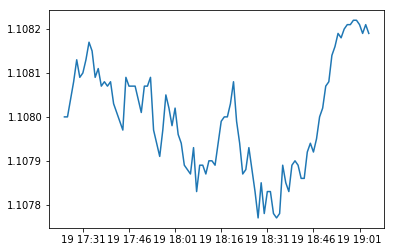

In [39]:
#
plt.plot(data['bidopen'])

In [40]:
data['bidopen'].shape

(100,)

In [41]:
ytr=np.array(data['bidopen'])
length=ytr.shape[0]
length_test=10
length_train=length-length_test
xtr=np.linspace(1,length,num=length)[:,None]
ytr=ytr[:,None]
ytr_train=ytr[0:length_train,:]
xtr_train=xtr[0:length_train,:]
ytr_test=ytr[(length_train):,:]
xtr_test=xtr[(length_train):,:]

In [42]:
#ytr_train.shape
xtr_train.shape
xtr_test.shape

(10, 1)

In [43]:
import GPy
Q = xtr_train.shape[1]
#k = RationalQuadratic(Q)
k1=GPy.kern.StdPeriodic(Q)
k2=GPy.kern.RBF(Q)
k3=GPy.kern.Linear(Q)
k4=GPy.kern.Poly(Q)

# Combining Polynomial kernal and periodic kernal

Polynomial kernal:
    $$k(x,y)=(x^T*y+c)^d$$


Periodic kernal:
    k(x,y) = $$\theta_1 \exp \left[  - \frac{1}{2} \sum_{i=1}^{input\_dim}
       \left( \frac{\sin(\frac{\pi}{T_i} (x_i - y_i) )}{l_i} \right)^2 \right]$$

Optimization restart 1/50, f = -285.99129412039673
Optimization restart 2/50, f = -354.2297163745336


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 3/50, f = -482.8590381610552
Optimization restart 4/50, f = -235.6930570557895
Optimization restart 5/50, f = -160.0976890754409
Optimization restart 6/50, f = -257.34888409942056
Optimization restart 7/50, f = -370.71381579067264
Optimization restart 8/50, f = -339.5039796176057
Optimization restart 9/50, f = -205.1410198567256
Optimization restart 10/50, f = -694.1915310138031
Optimization restart 11/50, f = -235.21347777527362
Optimization restart 12/50, f = -568.368134917712
Optimization restart 13/50, f = -708.4492127632328
Optimization restart 14/50, f = -201.05773585443433
Optimization restart 15/50, f = -175.76290118897674
Optimization restart 16/50, f = -205.75062003196123
Optimization restart 17/50, f = -664.5912668616813
Optimization restart 18/50, f = -220.55025845279494
Optimization restart 19/50, f = -674.9963291760189
Optimization restart 20/50, f = -194.53460412836225
Optimization restart 21/50, f = -277.4618039801296
Optimization restart 22/50, f =

 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:168: 

Optimization restart 37/50, f = -695.4298592479271
Optimization restart 38/50, f = -292.6474047913345
Optimization restart 39/50, f = -621.3006223467062
Optimization restart 40/50, f = -280.86246919445057
Optimization restart 41/50, f = -330.2199522359321
Optimization restart 42/50, f = -708.449446825393
Optimization restart 43/50, f = -686.9185403694044
Optimization restart 44/50, f = -541.6635688198901
Optimization restart 45/50, f = -259.5604075017929
Optimization restart 46/50, f = -308.71223038358903
Optimization restart 47/50, f = -325.16943638973106
Optimization restart 48/50, f = -701.6064420696406
Optimization restart 49/50, f = -708.329055009253
Optimization restart 50/50, f = -399.61350914423866


GP_regression.,value,constraints,priors
sum.std_periodic.variance,0.5956090150472456,+ve,
sum.std_periodic.period,0.3365034163126875,+ve,
sum.std_periodic.lengthscale,5586.481393322501,+ve,
sum.poly.variance,3.490385812657161e-14,+ve,
sum.poly.scale,0.06974688035351205,+ve,
sum.poly.bias,22.110570186405713,+ve,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


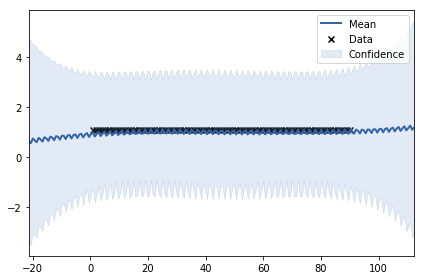

In [44]:
k=k1+k4 #polynomial kernal and periodic kernal
m = GPy.models.GPRegression(X=xtr_train, Y=ytr_train, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)

{'dataplot': [<matplotlib.collections.PathCollection at 0x1a256ee358>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a256ee240>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a256ee390>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


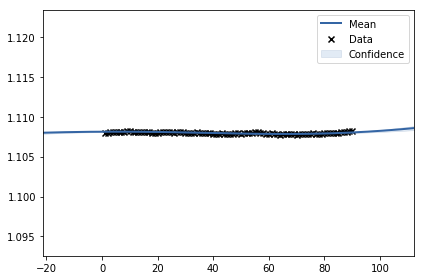

In [45]:
m.plot()

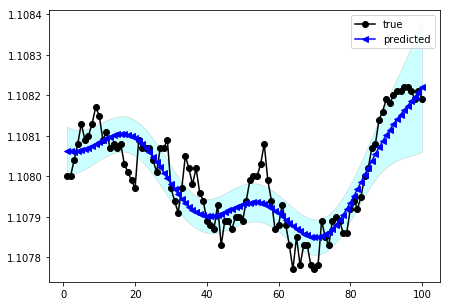

In [46]:
output_path='./report/'+period+'/'
if not os.path.exists(output_path):
    os.makedirs(output_path)
img_id='polynomial+periodical_whole'
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
plot_fit(xtr, ytr, mu, var,output_path=output_path,img_id=img_id)


Name : GP regression
Objective : -709.818602393798
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.std_periodic.variance     |      0.5956090150472456  |      +ve      |        
  sum.std_periodic.period       |      0.3365034163126875  |      +ve      |        
  sum.std_periodic.lengthscale  |       5586.481393322501  |      +ve      |        
  sum.poly.variance             |   3.490385812657161e-14  |      +ve      |        
  sum.poly.scale                |     0.06974688035351205  |      +ve      |        
  sum.poly.bias                 |      22.110570186405713  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


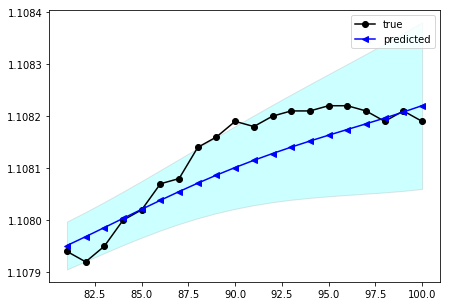

In [47]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
img_id='polynomial+periodical_prediction'
plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:],output_path=output_path,img_id=img_id)

In [48]:
def RMSE(model, xpred, ypred):
    mu, V = model.predict(xpred)
    Sqerr = np.power(ypred - mu,2)
    MSE = np.sum(Sqerr)
    rmse = np.sqrt(MSE/ypred.size)
    print ('RMSE = ' +str(rmse))
    print ('Log likelihood is ' + str(model.log_likelihood()))
    return rmse
RMSE(m,xtr_test,ytr_test)


RMSE = 4.9422778659968374e-05
Log likelihood is 709.818602393798


4.9422778659968374e-05

In [49]:
mu,v=m.predict(xtr_test)
np.sqrt(np.power(ytr_test[0]-mu[0],2))

array([6.48898319e-05])

In [50]:
#X_extrap=np.linspace(0,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)


# RBF Kernal


$$k(r) = \sigma^2 \exp \bigg(- \frac{1}{2} r^2 \bigg)$$

Optimization restart 1/50, f = -701.6532507469608
Optimization restart 2/50, f = -701.653250326411
Optimization restart 3/50, f = -701.6532505147253
Optimization restart 4/50, f = -701.653250187495
Optimization restart 5/50, f = -701.6532504321086
Optimization restart 6/50, f = -701.6532503674198


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Optimization restart 7/50, f = -701.6532503267357
Optimization restart 8/50, f = -701.6532503140564
Optimization restart 9/50, f = -701.2997034131507


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 10/50, f = -701.0761795919261
Optimization restart 11/50, f = -701.6532502887521
Optimization restart 12/50, f = -698.9362104635027
Optimization restart 13/50, f = -701.653250178652
Optimization restart 14/50, f = -701.6532503056603
Optimization restart 15/50, f = -701.6532502975726
Optimization restart 16/50, f = -701.6532501393888
Optimization restart 17/50, f = -697.2259765561005
Optimization restart 18/50, f = -701.653250033522
Optimization restart 19/50, f = -701.6532502897262
Optimization restart 20/50, f = -701.6532503887422
Optimization restart 21/50, f = -701.6532500177303
Optimization restart 22/50, f = -701.6532501922269
Optimization restart 23/50, f = -701.6532502925785
Optimization restart 24/50, f = -693.8601684900135
Optimization restart 25/50, f = -701.6532502052727
Optimization restart 26/50, f = -701.6532502306587
Optimization restart 27/50, f = -701.6532501579737
Optimization restart 28/50, f = -701.6532502148706
Optimization restart 29/50, f = -

GP_regression.,value,constraints,priors
rbf.variance,0.9867779182144522,+ve,
rbf.lengthscale,565.3897606143468,+ve,
Gaussian_noise.variance,2.991823738779201e-42,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a27afcf98>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a28c4a400>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a28c4a9b0>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


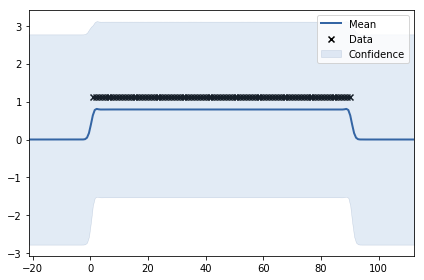

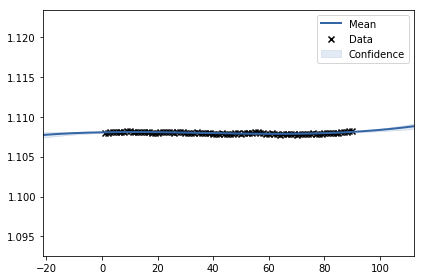

In [51]:
k=k2
m = GPy.models.GPRegression(X=X_star, Y=Y_star, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -701.6532507469608
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.9867779182144522  |      +ve      |        
  rbf.lengthscale          |      565.3897606143468  |      +ve      |        
  Gaussian_noise.variance  |  2.991823738779201e-42  |      +ve      |        


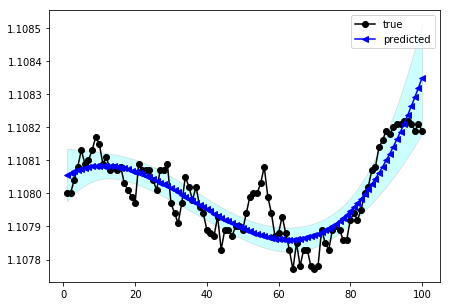

In [52]:
print(m)
mu,var = m.predict(xtr)

img_id='RBF_whole'

plot_fit(xtr, ytr, mu, var,output_path=output_path,img_id=img_id)


Name : GP regression
Objective : -701.6532507469608
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.9867779182144522  |      +ve      |        
  rbf.lengthscale          |      565.3897606143468  |      +ve      |        
  Gaussian_noise.variance  |  2.991823738779201e-42  |      +ve      |        


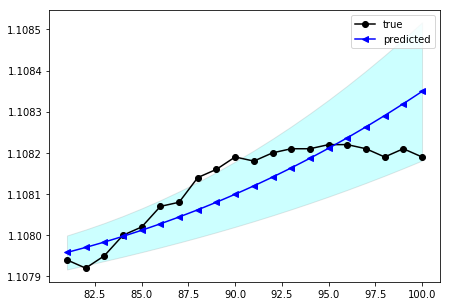

In [53]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
img_id='RBF_prediction'

plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:],output_path=output_path,img_id=img_id)

In [54]:
#X_extrap=np.linspace(1,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)

In [55]:
def RMSE(model, xpred, ypred):
    mu, V = model.predict(xpred)
    Sqerr = np.power(ypred - mu,2)
    MSE = np.sum(Sqerr)
    rmse = np.sqrt(MSE/ypred.size)
    print ('RMSE = ' +str(rmse))
    print ('Log likelihood is ' + str(model.log_likelihood()))
    return rmse
RMSE(m,xtr_test,ytr_test)


RMSE = 7.771217902614146e-05
Log likelihood is 701.6532507469608


7.771217902614146e-05

In [56]:
mu,v=m.predict(xtr_test)
np.sqrt(np.power(ytr_test[0]-mu[0],2))

array([6.01869406e-05])

# Combine RBF kernal and Polynomial kernal

Optimization restart 1/50, f = -701.9928704361174
Optimization restart 2/50, f = -692.8085102978233
Optimization restart 3/50, f = -693.3101465313161


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 4/50, f = -712.1867974337686


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 5/50, f = -706.5913852310897
Optimization restart 6/50, f = -699.5929966979099
Optimization restart 7/50, f = -690.0390107019342
Optimization restart 8/50, f = -693.3101462097009
Optimization restart 9/50, f = -696.6167296861424
Optimization restart 10/50, f = -675.1298474049066


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:168: 

Optimization restart 11/50, f = -708.2652219159241
Optimization restart 12/50, f = -690.0390072847695
Optimization restart 13/50, f = -702.984722211762
Optimization restart 14/50, f = -684.6806849602623
Optimization restart 15/50, f = -713.2519684374781
Optimization restart 16/50, f = -685.1439586719744
Optimization restart 17/50, f = -713.2519012456183
Optimization restart 18/50, f = 34.651902451598914
Optimization restart 19/50, f = -658.8339573811487
Optimization restart 20/50, f = -674.8901490357396
Optimization restart 21/50, f = -705.4369804339708
Optimization restart 22/50, f = -679.1864225850906
Optimization restart 23/50, f = -713.8814196400958
Optimization restart 24/50, f = -693.320386635821
Optimization restart 25/50, f = -708.7856220271709
Optimization restart 26/50, f = -704.4752980757312
Optimization restart 27/50, f = -713.2520260273155
Optimization restart 28/50, f = -708.087180138323


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:overflow encountered in true_divide


Optimization restart 29/50, f = -669.1180522283076
Optimization restart 30/50, f = -686.6775346444052
Optimization restart 31/50, f = -690.0390083481064
Optimization restart 32/50, f = -701.0079229104755
Optimization restart 33/50, f = -693.310145887162
Optimization restart 34/50, f = 113.10851979827197
Optimization restart 35/50, f = -663.4155889903673
Optimization restart 36/50, f = -708.7856212493192
Optimization restart 37/50, f = -693.3101483755675
Optimization restart 38/50, f = -666.7105568514122
Optimization restart 39/50, f = -668.4992723822284
Optimization restart 40/50, f = -700.7763222225217
Optimization restart 41/50, f = -685.1369091804742
Optimization restart 42/50, f = -661.2976139768152
Optimization restart 43/50, f = -691.5640560234581
Optimization restart 44/50, f = -713.9223472081148
Optimization restart 45/50, f = -690.3050674915537
Optimization restart 46/50, f = -677.2977761587177
Optimization restart 47/50, f = -698.5760541078961
Optimization restart 48/50, f = 

GP_regression.,value,constraints,priors
sum.rbf.variance,4.881384271587367e-09,+ve,
sum.rbf.lengthscale,6.633857025942742,+ve,
sum.std_periodic.variance,1.2275875455103595,+ve,
sum.std_periodic.period,0.9888325043949668,+ve,
sum.std_periodic.lengthscale,7471.773980230391,+ve,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a29737d30>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a29780c50>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a2b18b198>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


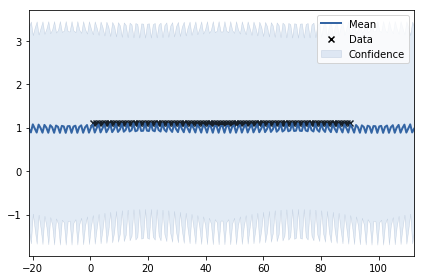

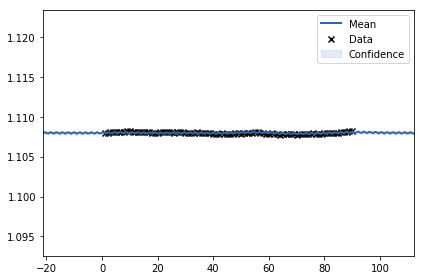

In [58]:
k=k2+k1
m = GPy.models.GPRegression(X=X_star, Y=Y_star, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -713.9223472081148
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.rbf.variance              |   4.881384271587367e-09  |      +ve      |        
  sum.rbf.lengthscale           |       6.633857025942742  |      +ve      |        
  sum.std_periodic.variance     |      1.2275875455103595  |      +ve      |        
  sum.std_periodic.period       |      0.9888325043949668  |      +ve      |        
  sum.std_periodic.lengthscale  |       7471.773980230391  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


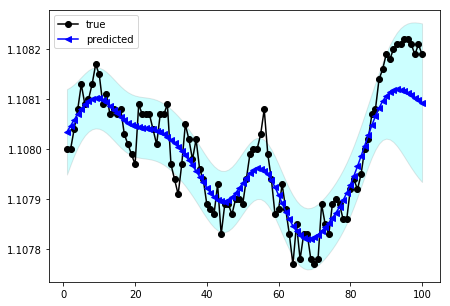

In [59]:
print(m)
mu,var = m.predict(xtr)
img_id='RBF_periodical_whole'
plot_fit(xtr, ytr, mu, var,output_path=output_path,img_id=img_id)

In [60]:
def RMSE(model, xpred, ypred):
    mu, V = model.predict(xpred)
    Sqerr = np.power(ypred - mu,2)
    MSE = np.sum(Sqerr)
    rmse = np.sqrt(MSE/ypred.size)
    print ('RMSE = ' +str(rmse))
    print ('Log likelihood is ' + str(model.log_likelihood()))
    return rmse
RMSE(m,xtr_test,ytr_test)

RMSE = 9.420285593767109e-05
Log likelihood is 713.9223472081148


9.420285593767109e-05

In [61]:
mu,v=m.predict(xtr_test)
np.sqrt(np.power(ytr_test[0]-mu[0],2))

array([6.56246164e-05])


Name : GP regression
Objective : -713.9223472081148
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.rbf.variance              |   4.881384271587367e-09  |      +ve      |        
  sum.rbf.lengthscale           |       6.633857025942742  |      +ve      |        
  sum.std_periodic.variance     |      1.2275875455103595  |      +ve      |        
  sum.std_periodic.period       |      0.9888325043949668  |      +ve      |        
  sum.std_periodic.lengthscale  |       7471.773980230391  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


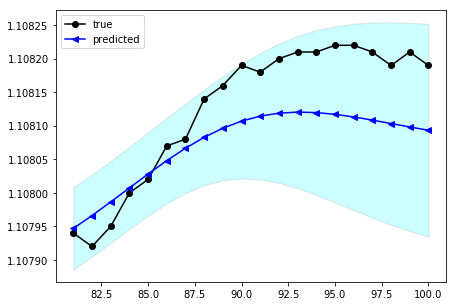

In [62]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
img_id='RBF+periodical_prediction'

plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:],output_path=output_path,img_id=img_id)

In [63]:
#X_extrap=np.linspace(1,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)

# Combine linear kernal and periodic kernal

The linear kernal is defined as:
$$k(x,y) = \sum_{i=1}^{\text{input_dim}} \sigma^2_i x_iy_i$$

Optimization restart 1/50, f = -701.6849977816622
Optimization restart 2/50, f = -694.8508945754302


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:168: 

Optimization restart 3/50, f = -688.7980416037935
Optimization restart 4/50, f = -656.1842427481373
Optimization restart 5/50, f = -655.6159264281029


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 6/50, f = -685.1439583508044
Optimization restart 7/50, f = -675.2857006690665
Optimization restart 8/50, f = -665.3126156014971
Optimization restart 9/50, f = -668.1272742242021
Optimization restart 10/50, f = -708.0852829290312
Optimization restart 11/50, f = -693.310147590526
Optimization restart 12/50, f = -696.6064265133857
Optimization restart 13/50, f = -698.264964842934
Optimization restart 14/50, f = -608.5929800265556
Optimization restart 15/50, f = -680.8025561445982
Optimization restart 16/50, f = -687.2279533573999
Optimization restart 17/50, f = -694.3067828339234
Optimization restart 18/50, f = -694.191490130958
Optimization restart 19/50, f = -669.6328668780072
Optimization restart 20/50, f = -663.6540672770292
Optimization restart 21/50, f = -656.020902104355
Optimization restart 22/50, f = -684.5253928626234
Optimization restart 23/50, f = -685.5327605125242
Optimization restart 24/50, f = -694.191359680068
Optimization restart 25/50, f = -668.939

GP_regression.,value,constraints,priors
sum.linear.variances,1.6812101445760524e-20,+ve,
sum.std_periodic.variance,8.910269438234355,+ve,
sum.std_periodic.period,95.20437811367714,+ve,
sum.std_periodic.lengthscale,24930.781452454128,+ve,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a28da1d30>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a27afc4e0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a27afca58>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


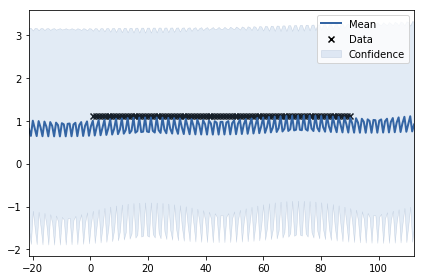

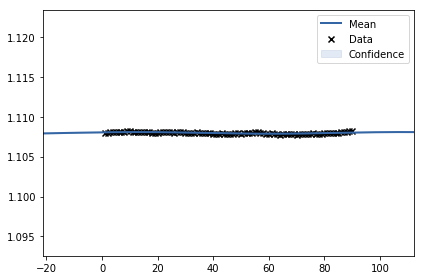

In [64]:
k=k3+k1
m = GPy.models.GPRegression(X=X_star, Y=Y_star, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)
m.plot() #after optimization

In [65]:
def RMSE(model, xpred, ypred):
    mu, V = model.predict(xpred)
    Sqerr = np.power(ypred - mu,2)
    MSE = np.sum(Sqerr)
    rmse = np.sqrt(MSE/ypred.size)
    print ('RMSE = ' +str(rmse))
    print ('Log likelihood is ' + str(model.log_likelihood()))
    return rmse
RMSE(m,xtr_test,ytr_test)

RMSE = 0.00015756132088000396
Log likelihood is 708.0852829290312


0.00015756132088000396

In [66]:
mu,v=m.predict(xtr_test)
np.sqrt(np.power(ytr_test[0]-mu[0],2))

array([0.00015641])


Name : GP regression
Objective : -708.0852829290312
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.linear.variances          |  1.6812101445760524e-20  |      +ve      |        
  sum.std_periodic.variance     |       8.910269438234355  |      +ve      |        
  sum.std_periodic.period       |       95.20437811367714  |      +ve      |        
  sum.std_periodic.lengthscale  |      24930.781452454128  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


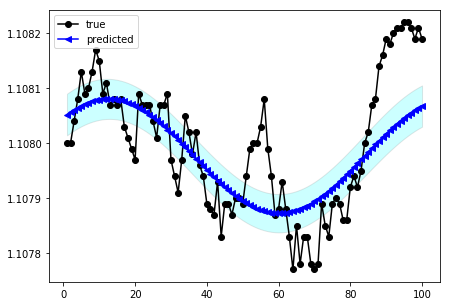

In [67]:
print(m)
mu,var = m.predict(xtr)
img_id='linear+periodical_whole'
plot_fit(xtr, ytr, mu, var,output_path=output_path,img_id=img_id)


Name : GP regression
Objective : -708.0852829290312
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.linear.variances          |  1.6812101445760524e-20  |      +ve      |        
  sum.std_periodic.variance     |       8.910269438234355  |      +ve      |        
  sum.std_periodic.period       |       95.20437811367714  |      +ve      |        
  sum.std_periodic.lengthscale  |      24930.781452454128  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


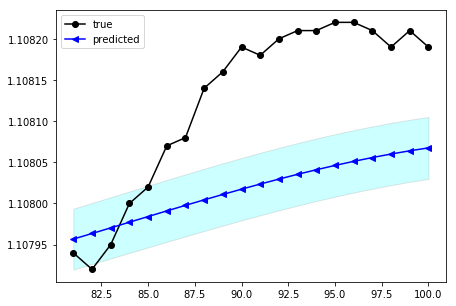

In [68]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
img_id='linear+periodical_prediction'
plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:],output_path=output_path,img_id=img_id)

In [69]:
#X_extrap=np.linspace(1,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)